## Global Terrorism Database

#### Using attack type, weapons used, description of the attack, etc., build a model that can predict what group may have been responsible for the incident.

We will first explore the global terrorism data and visualize then will develop a prediction model to predict the 'gname' i.e. terrorist group name causing the incident.

In [124]:
import math, os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

The data can be downloaded from the database [website](https://www.start.umd.edu/gtd/). The database contains few csv files with data from different time span splitted into separate files. Here, we look into the one of the files with terrorist incidents occuring between 1995 to 2012.

In [16]:
# Importing the data as pandas DataFrame

df = pd.read_excel("gtd_95to12_0617dist.xlsx", sheetname=0)
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,199501000001,1995,1,0,NaN,0,NaT,217,United States,1,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,"199501000001, 199501000002, 199501000003"
1,199501000002,1995,1,0,NaN,0,NaT,217,United States,1,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,"199501000002, 199501000001, 199501000003"
2,199501000003,1995,1,0,NaN,0,NaT,217,United States,1,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,"199501000003, 199501000001, 199501000002"
3,199501010001,1995,1,1,NaN,0,NaT,202,Tajikistan,7,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,199501010002,1995,1,1,NaN,0,NaT,209,Turkey,10,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [17]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [18]:
# missing values: NaN values in the data
def missing_values():
    temp_dict = dict()
    for i in df.columns:
        if df[i].isnull().sum() > 0: 
            temp_dict[i] = df[i].isnull().sum()
    return temp_dict

# gives the information of missing values in each of the decorations
len(missing_values())

104

In [19]:
# deleting the columns that contain more than 50% of its data NaNs
def delete_columns(col):
    if df[col].isnull().sum() > df[col].count()/2:
        del df[col]

for col in df.columns:
    delete_columns(col)

In [20]:
df.head(n=5)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,199501000001,1995,1,0,0,217,United States,1,North America,New Mexico,...,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,0,-9
1,199501000002,1995,1,0,0,217,United States,1,North America,New Mexico,...,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,0,-9
2,199501000003,1995,1,0,0,217,United States,1,North America,New Mexico,...,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,0,-9
3,199501010001,1995,1,1,0,202,Tajikistan,7,Central Asia,NaN,...,NaN,NaN,0,0.0,NaN,PGIS,-9,-9,1,1
4,199501010002,1995,1,1,0,209,Turkey,10,Middle East & North Africa,Istanbul,...,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1


In [21]:
# these are the columns left with us now
df.columns, print(df.columns.shape)

(57,)


(Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
        'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
        'longitude', 'specificity', 'vicinity', 'summary', 'crit1', 'crit2',
        'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
        'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
        'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
        'gname', 'motive', 'guncertain1', 'individual', 'nperpcap', 'claimed',
        'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
        'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte',
        'property', 'ishostkid', 'scite1', 'dbsource', 'INT_LOG', 'INT_IDEO',
        'INT_MISC', 'INT_ANY'],
       dtype='object'), None)

In [22]:
# Now we are left with these NaNs
# We need to engineer these missing values if we want to use these columns for 
# prediction model development later

missing_values()

{'city': 446,
 'claimed': 9260,
 'corp1': 14327,
 'guncertain1': 379,
 'ishostkid': 3,
 'latitude': 1033,
 'longitude': 1033,
 'motive': 16024,
 'natlty1': 427,
 'natlty1_txt': 427,
 'nkill': 835,
 'nkillter': 10364,
 'nkillus': 9435,
 'nperpcap': 12624,
 'nwound': 2499,
 'nwoundte': 11117,
 'nwoundus': 9626,
 'provstate': 2598,
 'scite1': 9325,
 'specificity': 4,
 'summary': 9263,
 'target1': 238,
 'targsubtype1': 3024,
 'targsubtype1_txt': 3024,
 'weapsubtype1': 5305,
 'weapsubtype1_txt': 5305}

## NaNs Imputation

Out of the remaining columns with missing values listed above, we will take into account only few of the important columns and impute the missing values on those columns.

In [23]:
df['claimed'].unique()

array([ nan,   0.,  -9.,   1.])

The claimed has only three unique values: 0: Not claimed, 1: claimed and -9: Unknown

If the value is missing we assume that the incident was not claimed ie. NaN => 0.

In [24]:
df['claimed'] = df['claimed'].fillna(0)

In [25]:
df['claimed'].unique()

array([ 0., -9.,  1.])

Let us see the missing values in the 'city' and 'longitdue' columns.
'latitude' and 'longitude' if missing are both missing for the same events.

In [59]:
df[df['city'].isnull()].shape[0], df[df['longitude'].isnull()].shape[0]

(446, 1033)

The number of incidents that miss both 'city' and 'longitude' informations.

In [53]:
tmp_list = ['country_txt', 'region_txt', 'city', 'longitude', 'latitude']

df[tmp_list][df['latitude'].isnull() & df['city'].isnull()].shape

(17, 5)

Since only 17 of the events miss both of the city and longitude information simultaneously. We we reciprocate the 'city' and 'latitude/longitude' missing values from each other columns. Those 17 events which miss both can be dropped.

In [91]:
rows_missing_both_city_coords = df[['city', 'latitude', 'longitude']][df['latitude'].isnull() & df['city'].isnull()].index.tolist()

# the new df ahead will not contain those 17 events: dropping those events 
df = df.drop(rows_missing_both_city_coords)

In [92]:
all_cities = df['city'].unique().tolist()
all_cities[:10]

['Albuquerque',
 'Dushanbe',
 'Istanbul',
 'Copenhagen',
 'Guatemala City',
 'Unknown',
 'Hebron',
 'Tbeng Rhpuos Kam Pong Chnnang Province',
 'Mallawi',
 'Assisi']

In [93]:
df[['city', 'longitude', 'latitude']].head()

,city,longitude,latitude
0,Albuquerque,-106.648639,35.084180
1,Albuquerque,-106.648639,35.084180
2,Albuquerque,-106.648639,35.084180
3,Dushanbe,68.780000,38.536667
4,Istanbul,28.950672,41.013517


In [95]:
df.shape

(55038, 57)

In [97]:
# storing the mode 'latitude' and 'longitude' values of each city: i.e. the most frequent value of the coordinates
# from the known values corresponding to the events occuring in the same city

city_coords_dict = dict()

for city in all_cities:
    long = float(df['longitude'][df['city'] == city].median())
    lat = float(df['latitude'][df['city'] == city].median())
    city_coords_dict[city] = [long, lat]

In [9]:
# equal number of events missing latitude and longitude => same events missing both?

print(df[df['longitude'].isnull()==True]['country_txt'].shape)
print(df[df['latitude'].isnull()==True]['country_txt'].shape)

(1033,)
(1033,)


## Plotting incidents place in the world map

In [10]:
# Import the basemap package
from mpl_toolkits.basemap import Basemap
from IPython.display import set_matplotlib_formats
from mpl_toolkits import basemap

# Turn on retina display mode
set_matplotlib_formats('retina')
# turn off interactive mode
plt.ioff()

In [11]:
# printing the all possible projections for the earth(sphere) to 2D plane map projections
print(basemap.supported_projections)

 cyl              Cylindrical Equidistant                 
 merc             Mercator                                
 tmerc            Transverse Mercator                     
 omerc            Oblique Mercator                        
 mill             Miller Cylindrical                      
 gall             Gall Stereographic Cylindrical          
 cea              Cylindrical Equal Area                  
 lcc              Lambert Conformal                       
 laea             Lambert Azimuthal Equal Area            
 nplaea           North-Polar Lambert Azimuthal           
 splaea           South-Polar Lambert Azimuthal           
 eqdc             Equidistant Conic                       
 aeqd             Azimuthal Equidistant                   
 npaeqd           North-Polar Azimuthal Equidistant       
 spaeqd           South-Polar Azimuthal Equidistant       
 aea              Albers Equal Area                       
 stere            Stereographic                         

/home/rabindra/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/rabindra/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/rabindra/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/rabindra/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


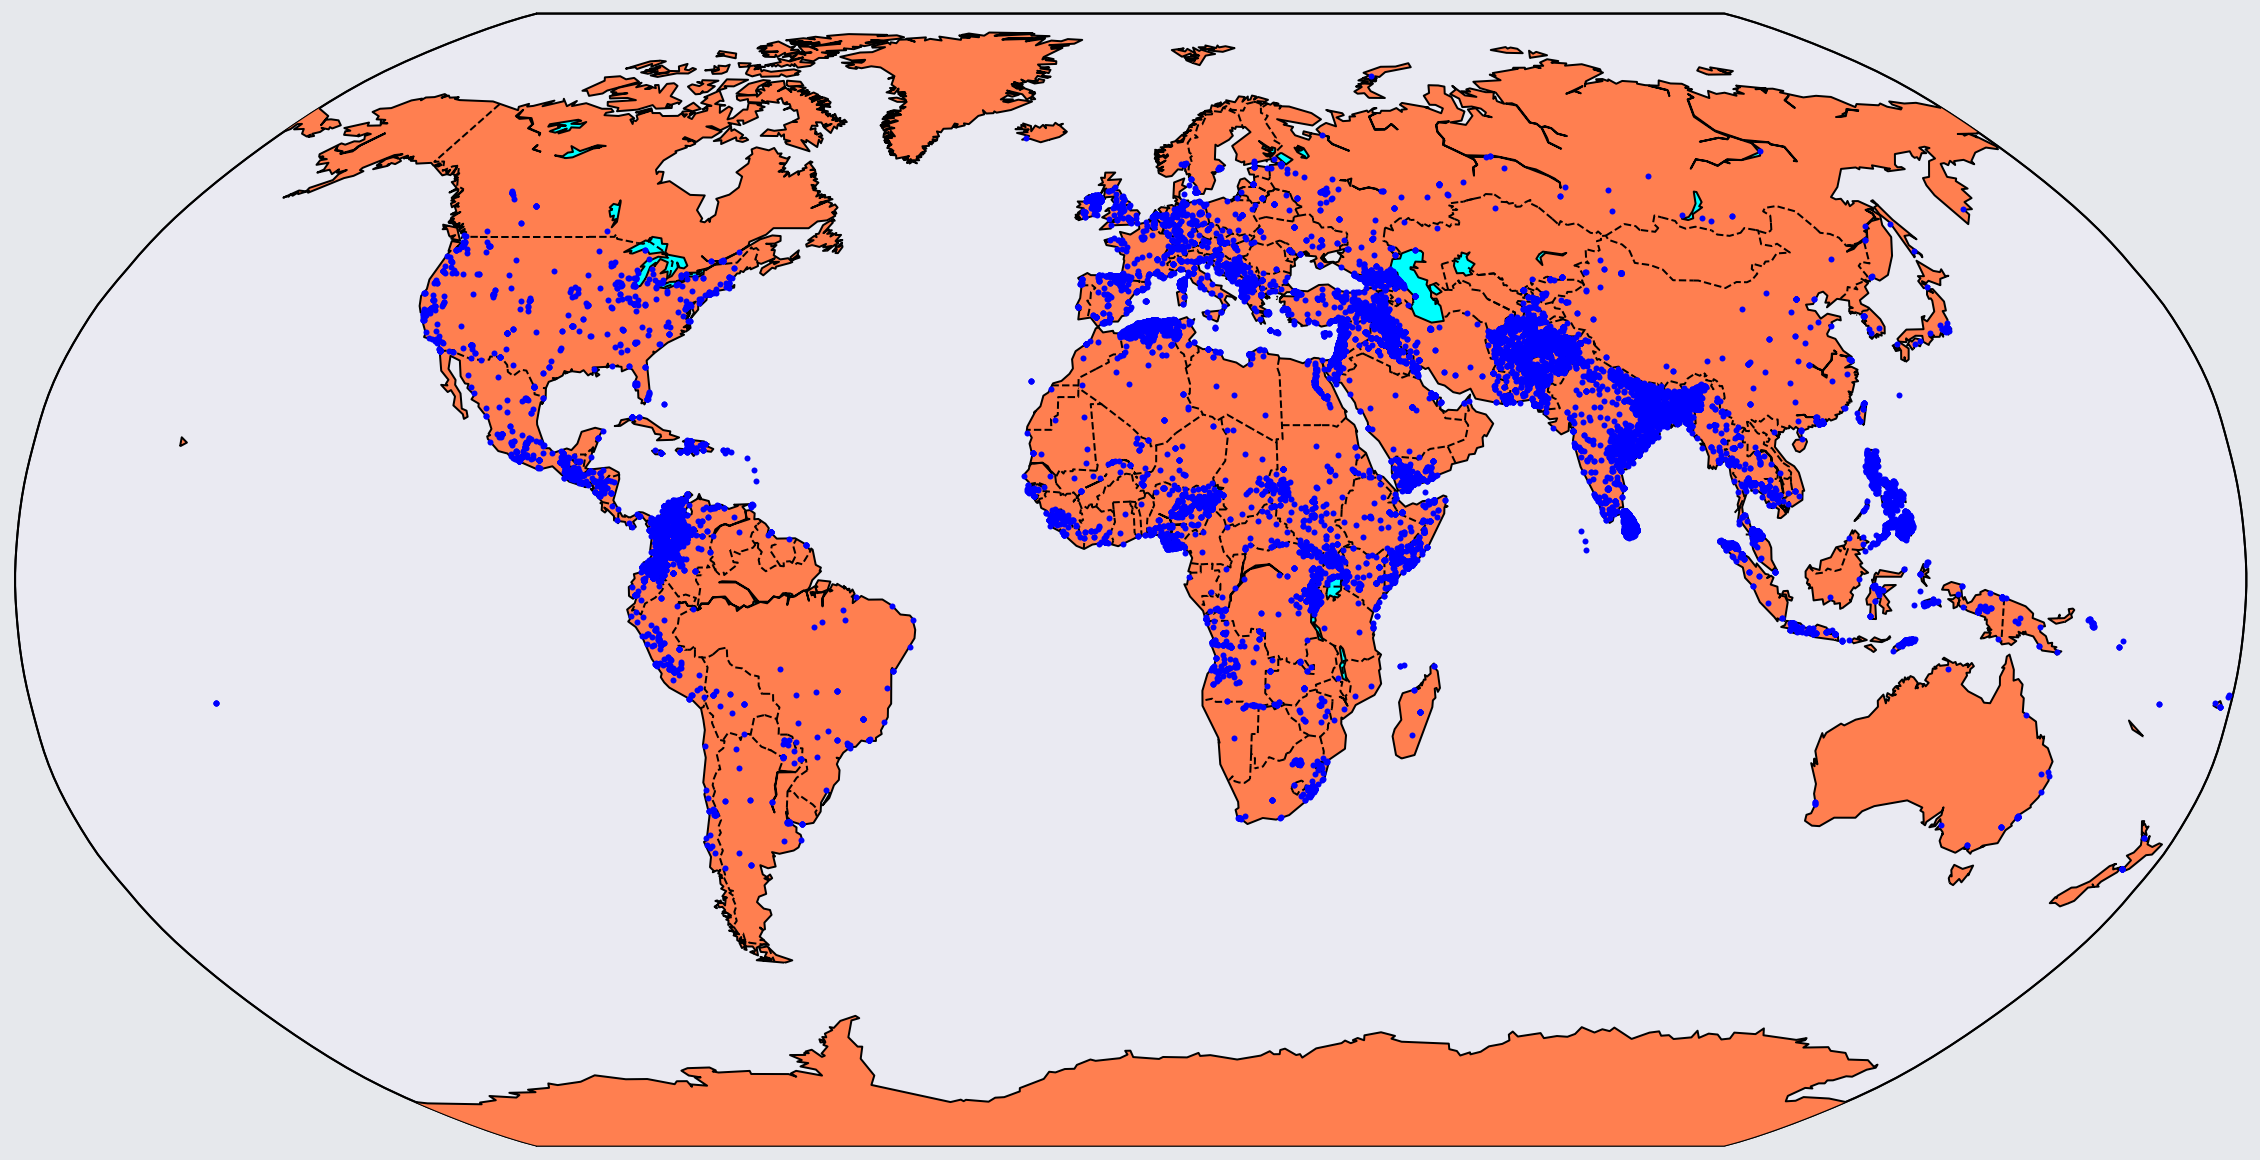

In [12]:
# Plotting the incidents locations in the map

fig = plt.figure(figsize=(20,15))
m = Basemap(projection='robin', lon_0=0)

# background color of the map - greyish color
fig.patch.set_facecolor('#e6e8ec')

#m.drawmapboundary(fill_color='aqua')

# Draw coastlines, and the edges of the map.
m.drawcoastlines(color='black')
m.fillcontinents(color='coral', lake_color='aqua')
m.drawcountries(linewidth=1, linestyle='dashed' ,color='black')


graticule_width = 20
graticule_color = 'white'

m.drawmapboundary()

# Convert latitude and longitude to x and y coordinates
xs = list(df['longitude'].astype(float))
ys = list(df['latitude'].astype(float))
x, y = m(xs, ys)
m.plot(x, y, 'bo', markersize=3)
plt.show()

In [154]:
# Create a DataFrame with only interesting columns

columns_dict = {'eventid', 'iyear', 'imonth', 'iday',  'country_txt', 'region', 'city', 'longitude', 'latitude',      
                'success', 'suicide', 'attacktype1_txt', 'targtype1_txt', 'weaptype1_txt', 'nkill' ,'nkillter' , 'gname'}
data_frame = pd.DataFrame(df, columns=columns_dict)
data_frame = data_frame.reindex_axis(columns_dict, axis='columns')
data_frame.tail(n=5)

,weaptype1_txt,imonth,iyear,attacktype1_txt,targtype1_txt,nkill,longitude,suicide,nkillter,region,latitude,success,city,iday,gname,country_txt,eventid
55050,Explosives/Bombs/Dynamite,12,2012,Bombing/Explosion,Private Citizens & Property,0.0,-5.971294,0,0.0,8,54.595213,0,Belfast,31,Unknown,United Kingdom,201212310038
55051,Explosives/Bombs/Dynamite,12,2012,Bombing/Explosion,Unknown,2.0,64.564087,0,2.0,6,31.823601,1,Gereshk,31,Taliban,Afghanistan,201212310039
55052,Firearms,12,2012,Assassination,Religious Figures/Institutions,1.0,72.974866,0,0.0,6,31.720497,1,Chiniot,31,Unknown,Pakistan,201212310040
55053,Firearms,12,2012,Hostage Taking (Kidnapping),Journalists & Media,0.0,37.638296,0,0.0,10,36.199260,1,Unknown,31,Al-Nusrah Front,Syria,201212310041
55054,Explosives/Bombs/Dynamite,12,2012,Bombing/Explosion,Unknown,0.0,71.408057,0,0.0,6,34.005176,0,Ghariza,31,Unknown,Pakistan,201301010011


In [23]:
data_frame['weaptype1_txt'].unique()

array(['Incendiary', 'Chemical', 'Explosives/Bombs/Dynamite', 'Unknown',
       'Firearms', 'Melee', 'Fake Weapons', 'Other', 'Sabotage Equipment',
       'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
       'Biological', 'Radiological'], dtype=object)

In [24]:
data_frame['attacktype1_txt'].unique()

array(['Facility/Infrastructure Attack', 'Assassination',
       'Bombing/Explosion', 'Unknown', 'Armed Assault', 'Hijacking',
       'Hostage Taking (Kidnapping)', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [25]:
data_frame['target1'].unique().shape

(35570,)

In [26]:
in_nepal = data_frame.loc[data_frame['country_txt']=='Nepal']
in_nepal['nkill'].sum()

1941.0

In [27]:
countries_list = df['country_txt'].unique().tolist()
countries_list
country_killed = dict()

for country in countries_list:
    tmp_df = df.loc[df['country_txt']==country]
    num_killed = tmp_df['nkill'].sum()
    country_killed[country] = num_killed

In [28]:
sorted_country_killed_dict = sorted(country_killed.items(), key= lambda x: x[1], reverse=True)
num_killed_list = [x[1] for x in sorted_country_killed_dict if x[1] > 1500]
corresponding_countries_list = [x[0] for x in sorted_country_killed_dict if x[1] > 1500]

In [29]:
# country name and number of people killed in each country

list(filter(lambda x: x[1] > 1500, sorted_country_killed_dict))

[('Iraq', 29589.0),
 ('Pakistan', 13307.0),
 ('Afghanistan', 11366.0),
 ('India', 10344.0),
 ('Algeria', 10142.0),
 ('Sri Lanka', 6027.0),
 ('Colombia', 5588.0),
 ('Russia', 3878.0),
 ('Burundi', 3436.0),
 ('United States', 3239.0),
 ('Nigeria', 3190.0),
 ('Somalia', 2950.0),
 ('Philippines', 2596.0),
 ('Sudan', 2191.0),
 ('Yemen', 2111.0),
 ('Uganda', 2079.0),
 ('Democratic Republic of the Congo', 2045.0),
 ('Nepal', 1941.0),
 ('Angola', 1767.0),
 ('Thailand', 1662.0),
 ('Rwanda', 1515.0)]

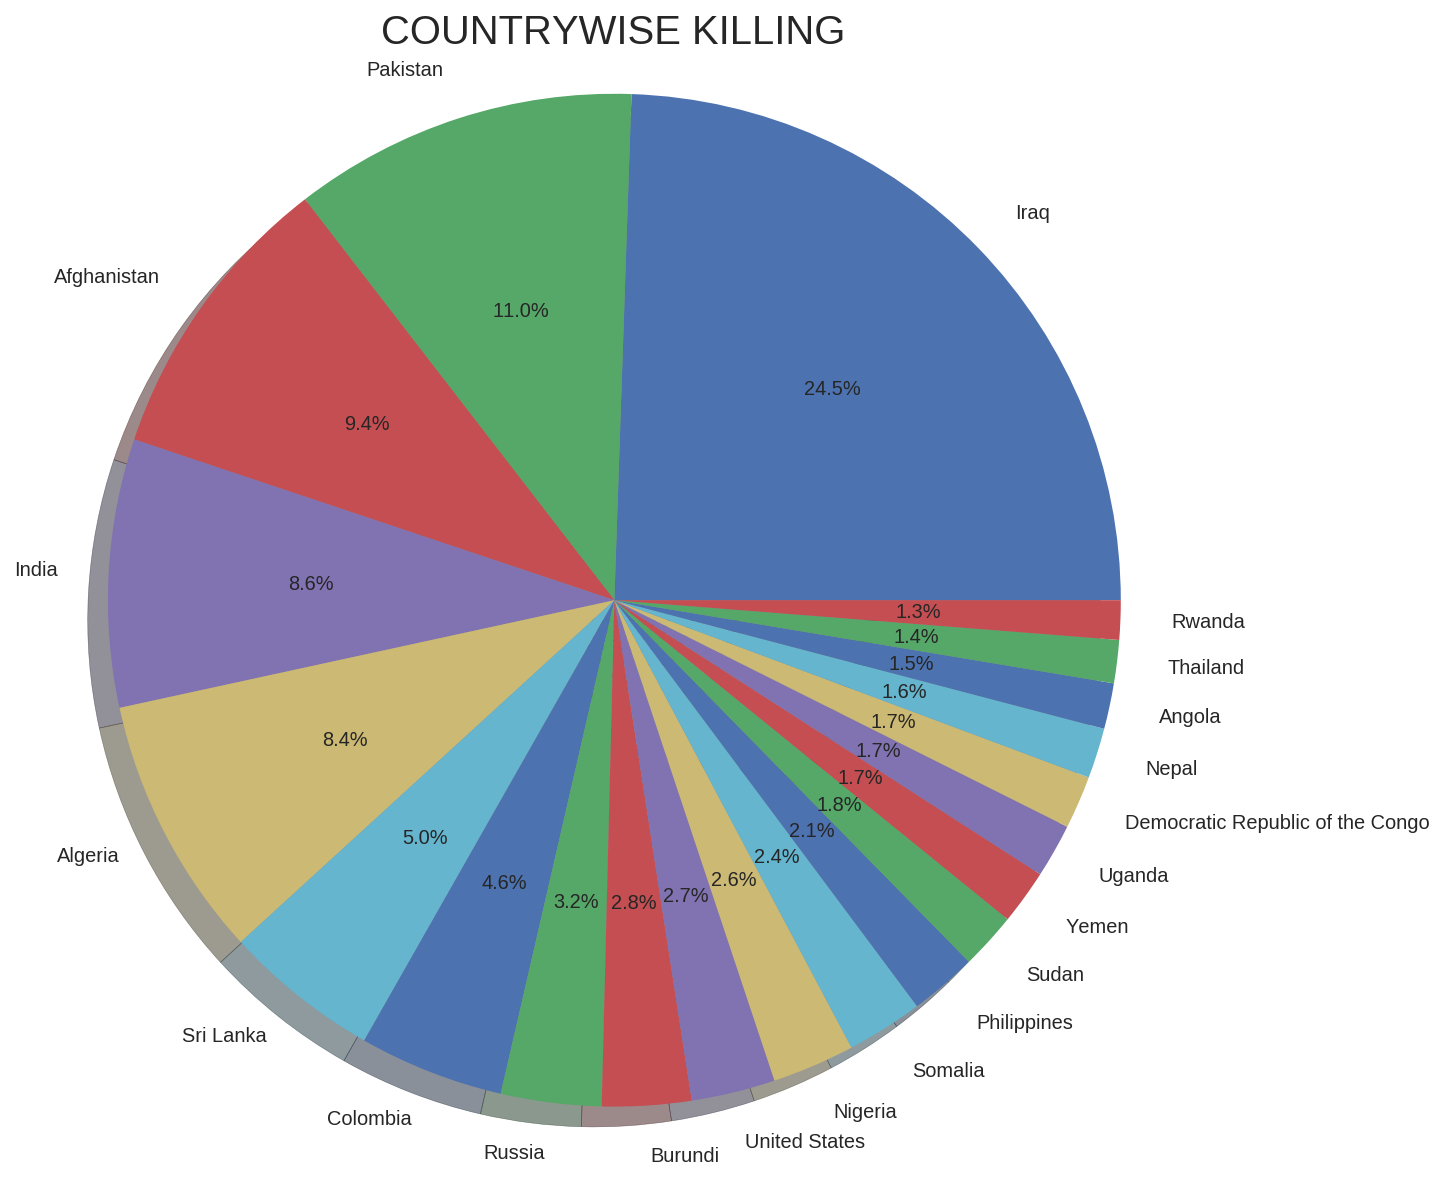

In [30]:
plt.figure(figsize=(10,10))
plt.pie(num_killed_list, labels=corresponding_countries_list, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title('COUNTRYWISE KILLING', fontsize=20)
plt.show()

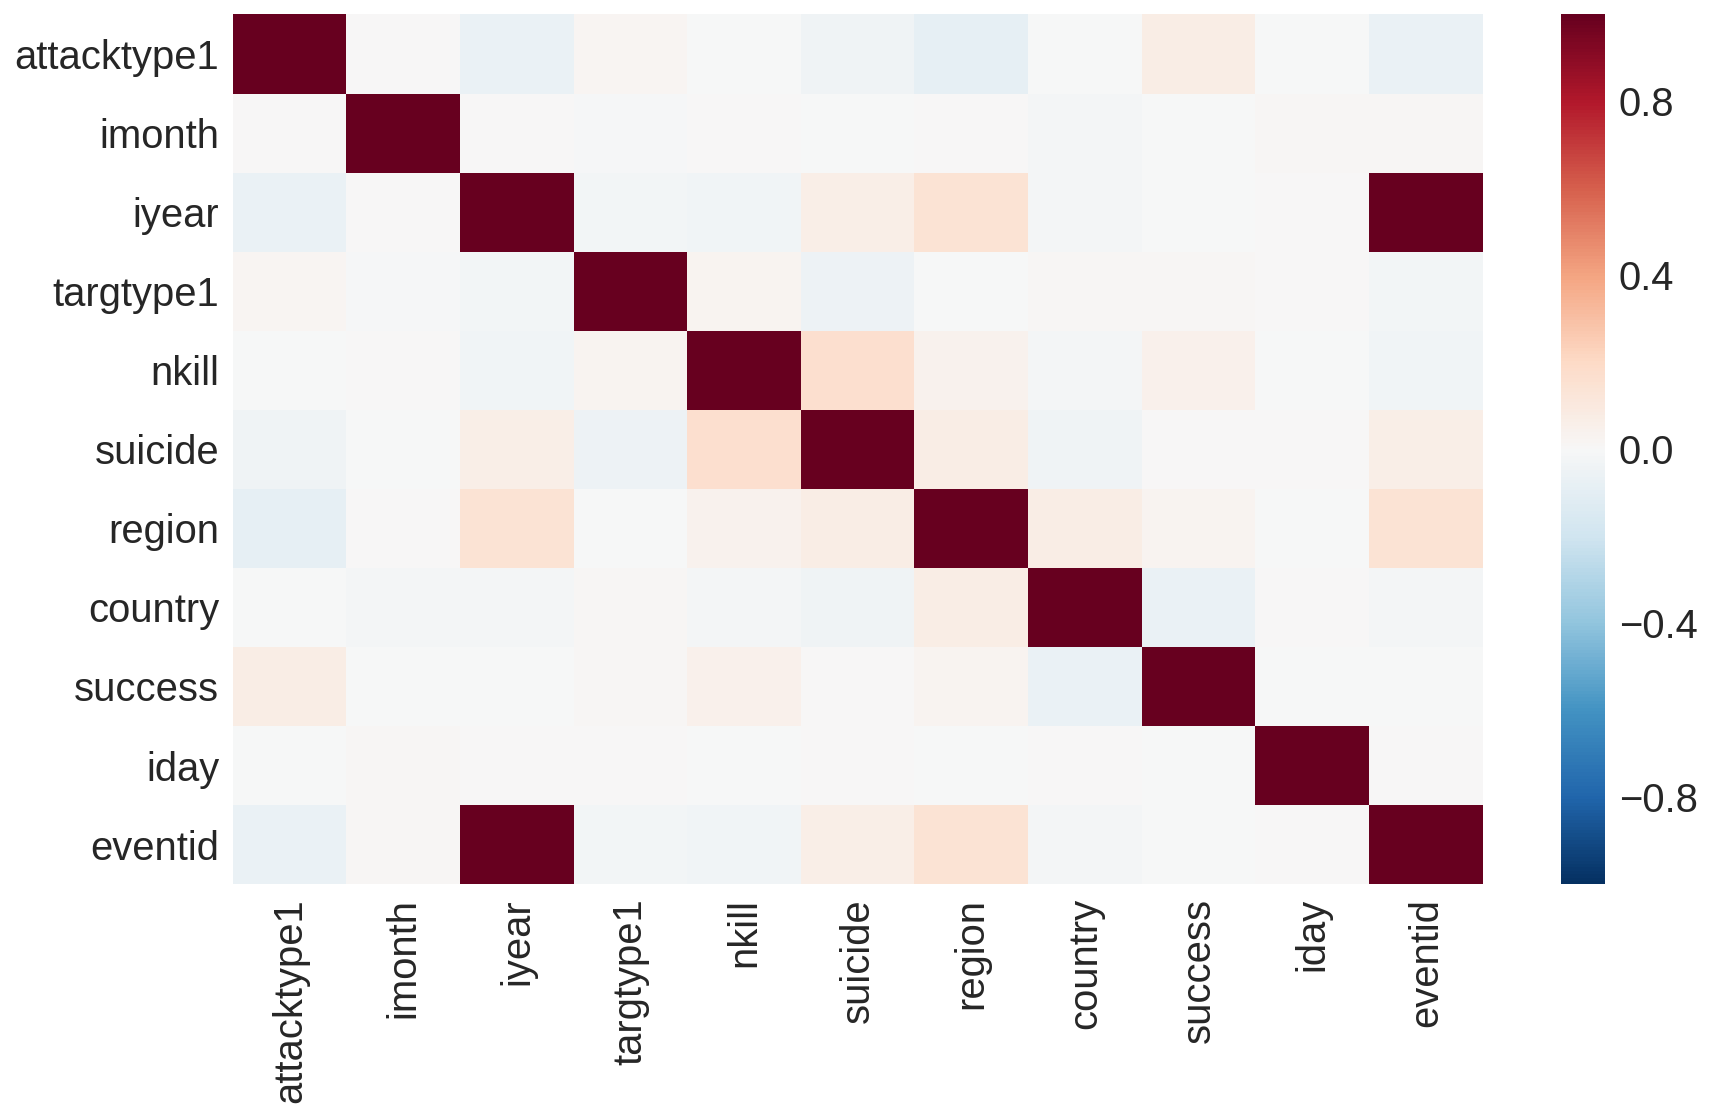

In [43]:
# Filling NaN in corr_matrix by 0

corr_matrix = (data_frame.corr()).fillna(0)
corrl = dict(corr_matrix.sum(axis=0))

high_corr_columns = [i for i in corrl.keys() if corrl[i] > 2.5]

new_df = pd.DataFrame(df, columns=columns_dict)

column_dict = dict()
for column in high_corr_columns:
    columns_dict[column] = 0

fig, ax = plt.subplots(figsize=(14,8))
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 1.5})
ax = sns.heatmap(new_df.corr(), cbar=True, ax=ax)
plt.show()

Since no two columns in the heatmap above (except iyear and eventid => eventid are generated with iyear, should also have correlation with imonth and iday) are realted to each other with strong correlation, all of them are important to consider ahead.

In [32]:
# Total number of incidents without claim: not 0 or 1 value, something else

original_length = len(df)
length = len(df.loc[df['claimed'].isin({0,1})])
print("Without claim incidents: ", original_length - length)

Without claim incidents:  10695


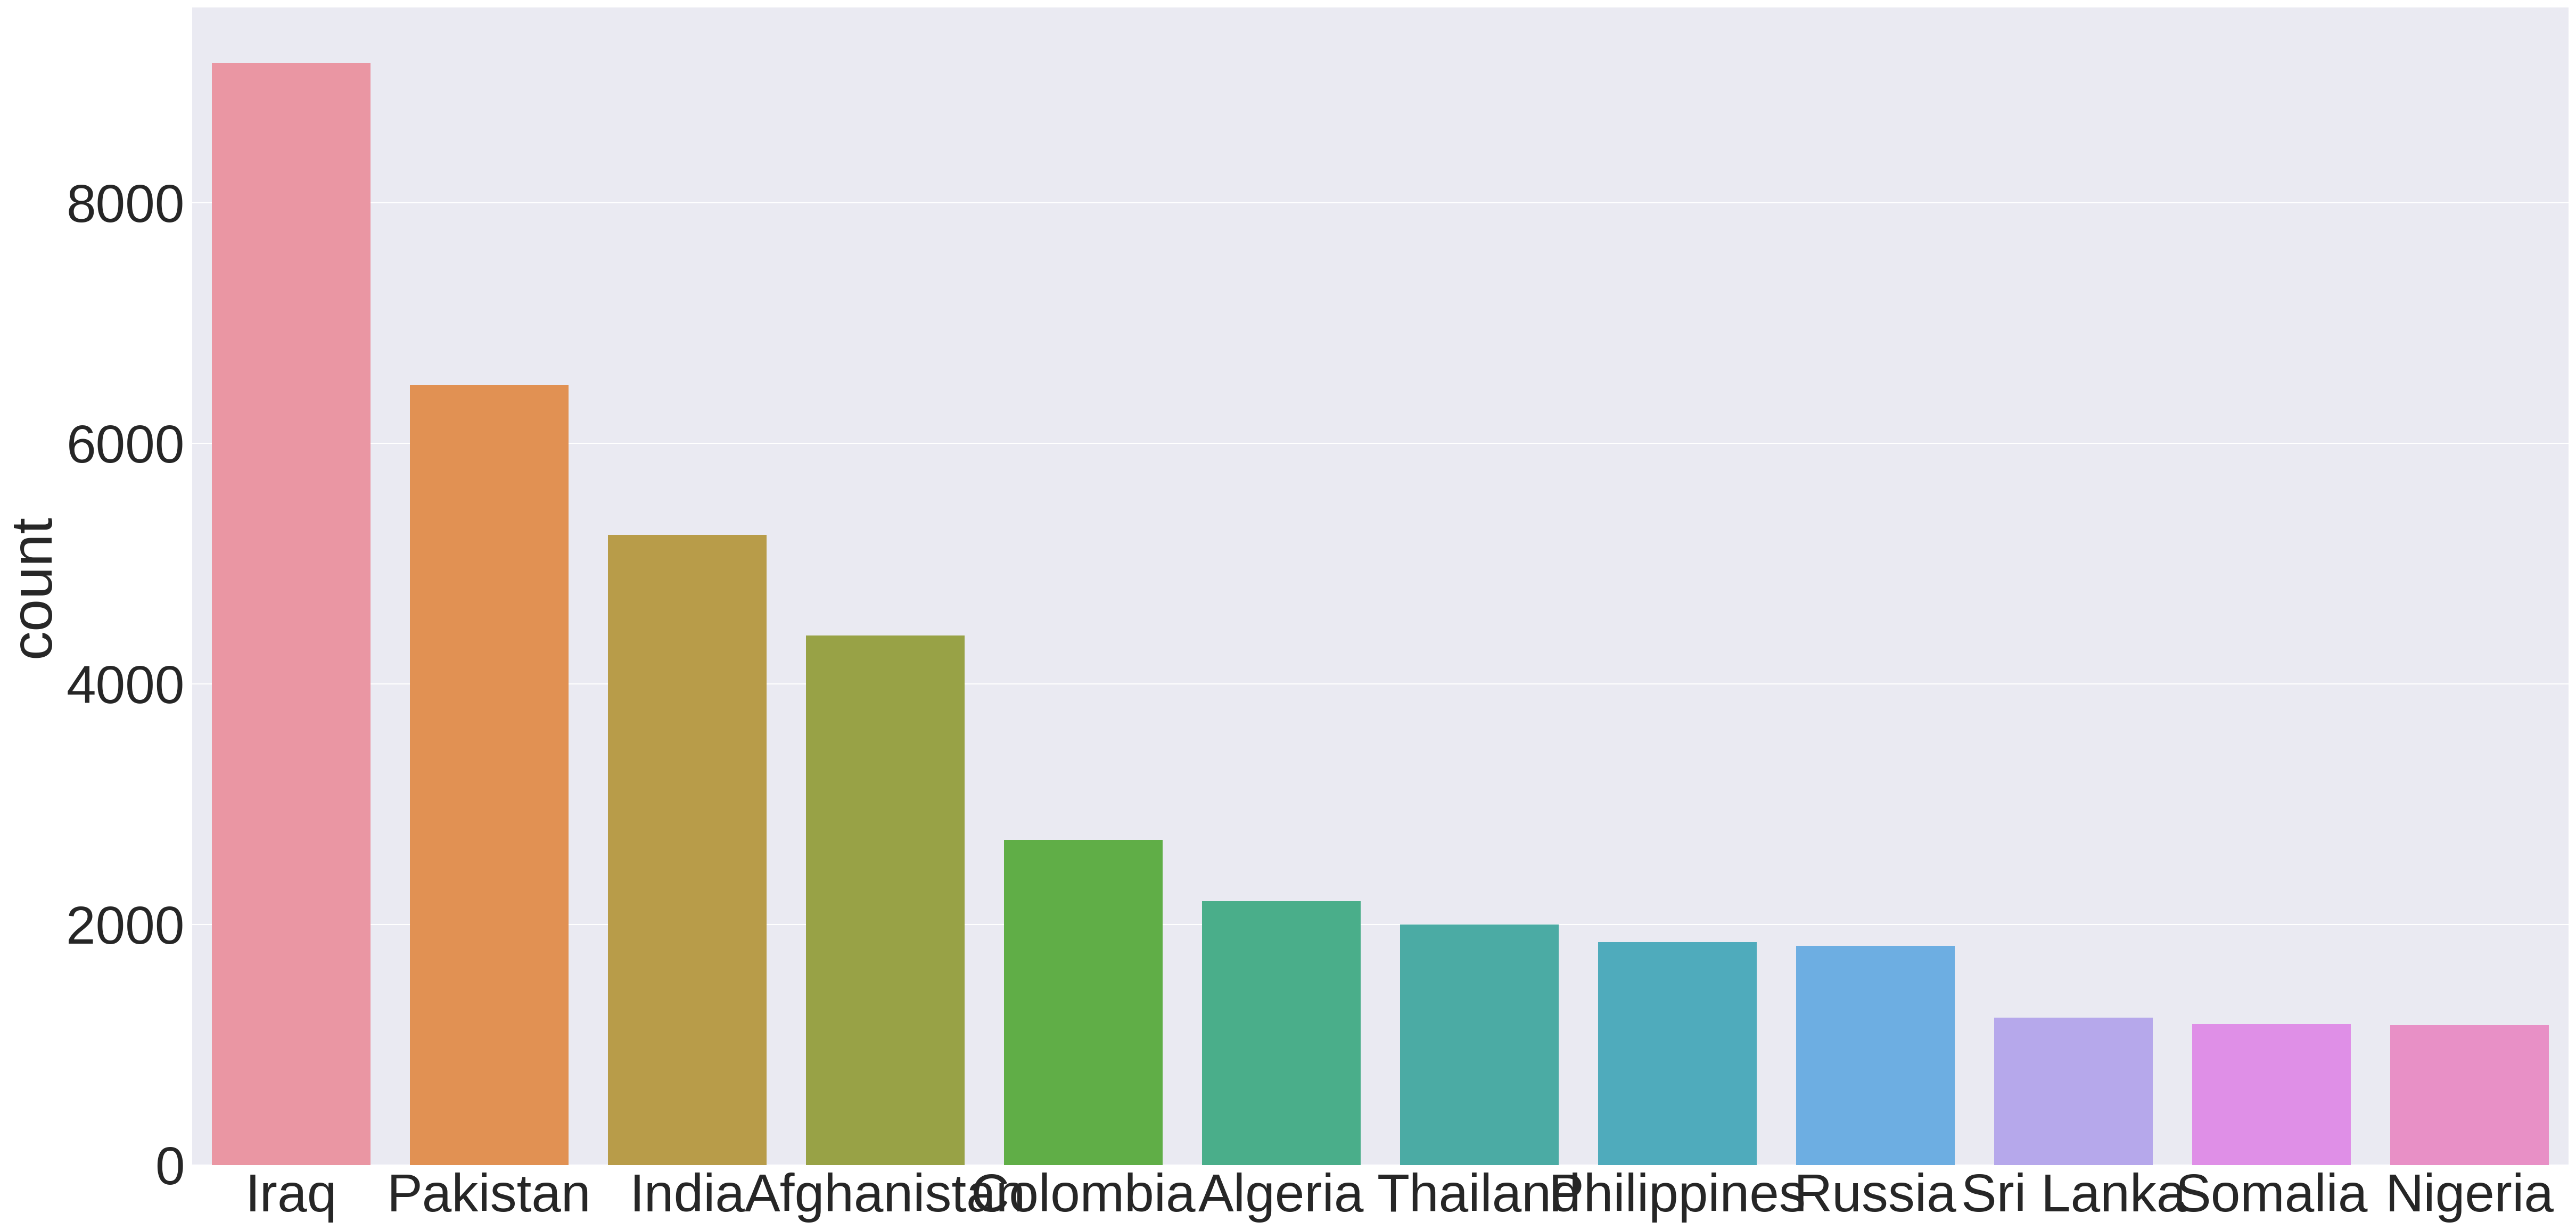

In [41]:
# Plotting the bar diagrams of countries with most incidents
country_list = data_frame['country_txt']
incident_country = country_list.value_counts()

my_dict = dict(incident_country)
new_dict = {}
for key in my_dict.keys():
    if my_dict[key] > 1000:
        new_dict.update({key : my_dict[key]})

countries_with_high_incidents = list(new_dict.keys())
num_incidents = list(new_dict.values())
my_list = []
for i in range(len(countries_with_high_incidents)):
    for j in range(num_incidents[i]):
        my_list.append(countries_with_high_incidents[i])

# Plotting the number of incidents in countries with most incidents
fig, ax = plt.subplots(figsize=(40,20)) 
sns.set(style='darkgrid')
sns.set_context("notebook", font_scale=5, rc={"lines.linewidth": 1.5})
ax = sns.countplot(my_list)
plt.show()

In [34]:
# Converting in the evenid to datetime format

tmp_datetime_df = pd.DataFrame({'year': df['iyear'].tolist(), 'month': df['imonth'].tolist(), 'day': df['iday'].tolist()})
#pd.to_datetime(tmp_datetime_df)

In [35]:
events_dates = pd.to_datetime(df['eventid'])

countries = df['country_txt']

dates = [events_dates[i].year for i in range(len(events_dates))]

In [36]:
years = np.arange(1970,2010)
x = pd.Series(dates)
#sns.barplot(data=x)
df.tail()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
55050,201212310038,2012,12,31,0,603,United Kingdom,8,Western Europe,Northern Ireland,...,0.0,0.0,0,0.0,"""Homes evacuated over pipe bomb,"" BBC, January...",START Primary Collection,-9,-9,1,1
55051,201212310039,2012,12,31,0,4,Afghanistan,6,South Asia,Helmand,...,0.0,0.0,0,0.0,"""12 Taliban perish in seperate incidents Cop k...",START Primary Collection,0,1,1,1
55052,201212310040,2012,12,31,0,153,Pakistan,6,South Asia,Punjab,...,0.0,0.0,0,0.0,"""Gunmen shoot dead prominent Shia Muslim in Pa...",START Primary Collection,-9,-9,0,-9
55053,201212310041,2012,12,31,1,200,Syria,10,Middle East & North Africa,Aleppo,...,0.0,0.0,0,1.0,"""American photographer escapes Syrian Islamist...",START Primary Collection,0,1,1,1
55054,201301010011,2012,12,31,0,153,Pakistan,6,South Asia,Khyber Pakhtunkhwa,...,0.0,0.0,0,0.0,"""Violence in Khyber Agency: Three injured by m...",START Primary Collection,-9,-9,0,-9


In [116]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'motive', 'guncertain1', 'individual', 'nperpcap', 'claimed',
       'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte',
       'property', 'ishostkid', 'scite1', 'dbsource', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY'],
      dtype='object')

In [119]:
pd.get_dummies(df['attacktype1_txt']).head()

,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0


### 'gname' prediction model